### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
train_data = pd.read_csv('SalaryData_Train.csv')
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test_data= pd.read_csv('SalaryData_Test.csv')
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### Data Understanding

In [4]:
train_data.shape

(30161, 14)

In [5]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [7]:
#Find Value counts for the columns of type 'Object' in the train data
for column in train_data:
    if train_data[column].dtypes=='O':
        print(column)
        print(train_data[column].value_counts())
    else:
        continue

workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
maritalstatus
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical  

In [8]:
test_data.shape

(15060, 14)

In [9]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
test_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [11]:
#Find Value counts for the columns of type 'Object' in the test data
for column in test_data:
    if test_data[column].dtypes=='O':
        print(column)
        print(test_data[column].value_counts())
    else:
        continue

workclass
 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
education
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
maritalstatus
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64
occupation
 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                

### Data Preparation

In [12]:
#Droping unwanted columns for the model Building
train_data.drop(columns =['educationno','relationship','race'],axis=1,inplace=True)

In [13]:
#Dropping unwanted columns for the model Building
test_data.drop(columns =['educationno','relationship','race'],axis=1,inplace=True)

In [14]:
#Finding no of duplicate rows in the train data
train_data[train_data.duplicated()].shape

(4822, 11)

In [15]:
#Droping all duplicate rows in the train data
train_data=train_data.drop_duplicates().reset_index(drop=True)
train_data

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
25334,53,Private,Masters,Married-civ-spouse,Exec-managerial,Male,0,0,40,United-States,>50K
25335,22,Private,Some-college,Never-married,Protective-serv,Male,0,0,40,United-States,<=50K
25336,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Female,0,0,38,United-States,<=50K
25337,58,Private,HS-grad,Widowed,Adm-clerical,Female,0,0,40,United-States,<=50K


In [16]:
#Finding no of duplicate rows in the test data
test_data[test_data.duplicated()].shape

(1518, 11)

In [17]:
#Droping all duplicate rows in the test data
test_data=test_data.drop_duplicates().reset_index(drop=True)
test_data

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,Never-married,Machine-op-inspct,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Male,7688,0,40,United-States,>50K
4,34,Private,10th,Never-married,Other-service,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
13537,48,Local-gov,Masters,Divorced,Other-service,Male,0,0,40,United-States,<=50K
13538,39,Private,Bachelors,Divorced,Prof-specialty,Female,0,0,36,United-States,<=50K
13539,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Male,0,0,50,United-States,<=50K
13540,44,Private,Bachelors,Divorced,Adm-clerical,Male,5455,0,40,United-States,<=50K


### Data Visualization - Understanding the Features

#### For Visualization purpose - concatenating training and testing data

In [18]:
merged_data=pd.concat([train_data,test_data])
merged_data

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
13537,48,Local-gov,Masters,Divorced,Other-service,Male,0,0,40,United-States,<=50K
13538,39,Private,Bachelors,Divorced,Prof-specialty,Female,0,0,36,United-States,<=50K
13539,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Male,0,0,50,United-States,<=50K
13540,44,Private,Bachelors,Divorced,Adm-clerical,Male,5455,0,40,United-States,<=50K


#### Distplots and Box Plots for Continuous Features

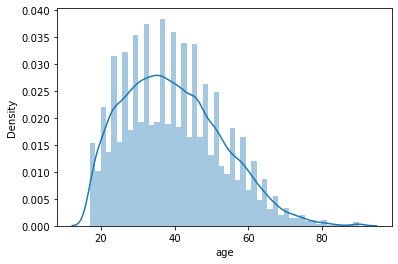

In [19]:
sns.distplot(merged_data['age'])
plt.show()

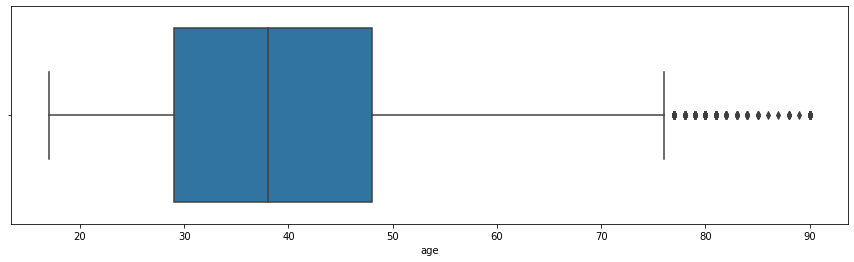

In [20]:
plt.figure(figsize=(15,4))
sns.boxplot(merged_data['age'])
plt.show()

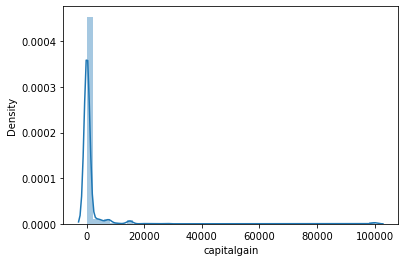

In [21]:
sns.distplot(merged_data['capitalgain'])
plt.show()

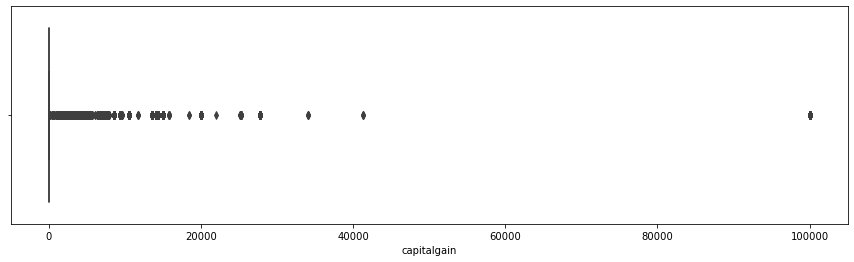

In [22]:
plt.figure(figsize=(15,4))
sns.boxplot(merged_data['capitalgain'])
plt.show()

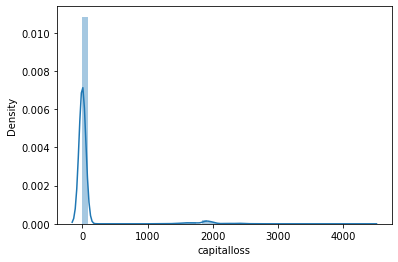

In [23]:
sns.distplot(merged_data['capitalloss'])
plt.show()

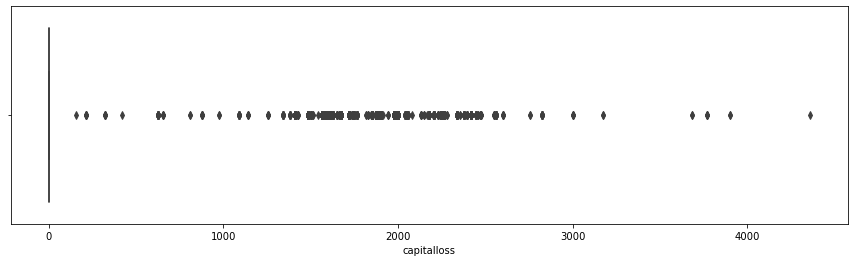

In [24]:
plt.figure(figsize=(15,4))
sns.boxplot(merged_data['capitalloss'])
plt.show()

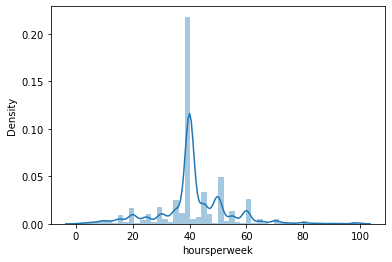

In [25]:
sns.distplot(merged_data['hoursperweek'])
plt.show()

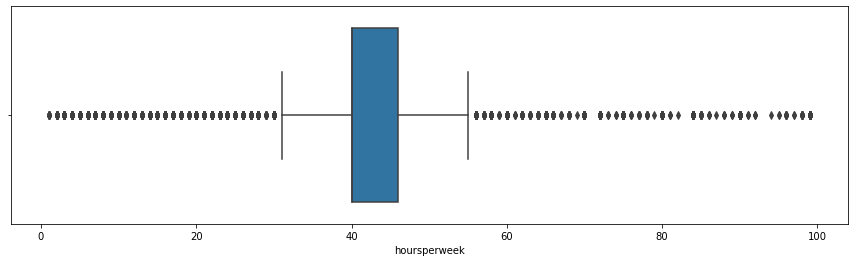

In [26]:
plt.figure(figsize=(15,4))
sns.boxplot(merged_data['hoursperweek'])
plt.show()

#### Pie plots and Count plots for Categorical Features

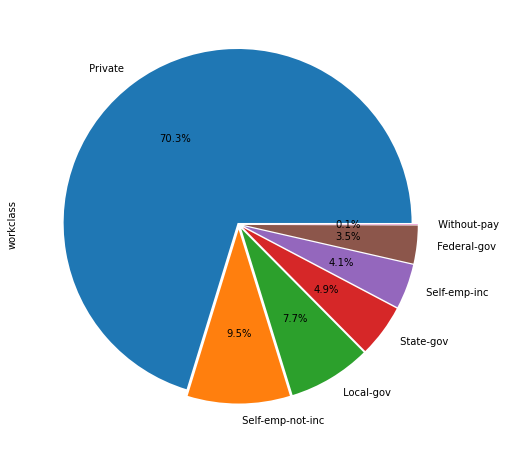

In [27]:
plt.figure(figsize=(8,8))
merged_data['workclass'].value_counts().plot(kind='pie',explode=[0.01,0.03,0.03,0.03,0.03,0.03,0.03],autopct='%.1f%%')
plt.show()

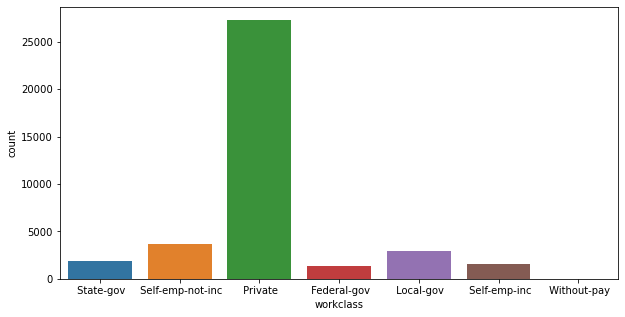

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(merged_data['workclass'])
plt.show()

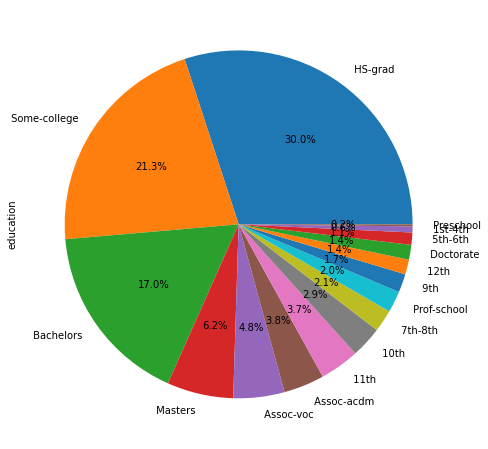

In [29]:
plt.figure(figsize=(8,8))
merged_data['education'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

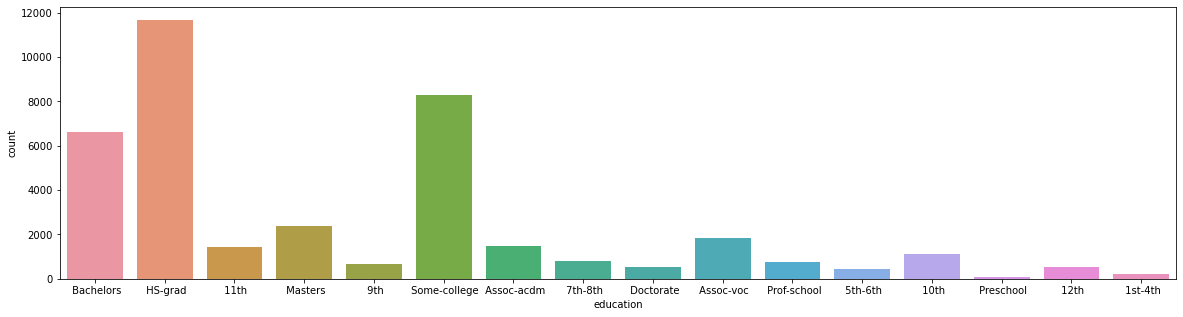

In [30]:
plt.figure(figsize=(20,5))
sns.countplot(merged_data['education'])
plt.show()

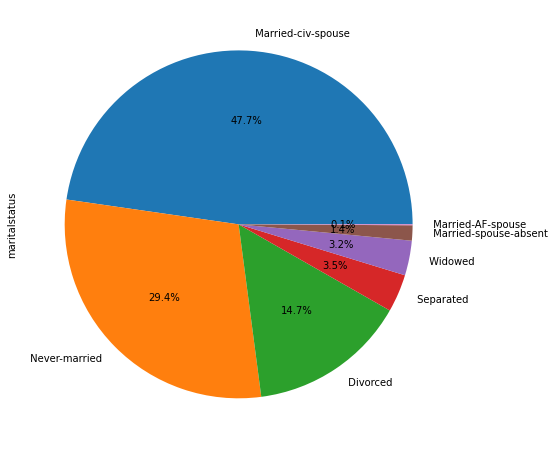

In [31]:
plt.figure(figsize=(8,8))
merged_data['maritalstatus'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

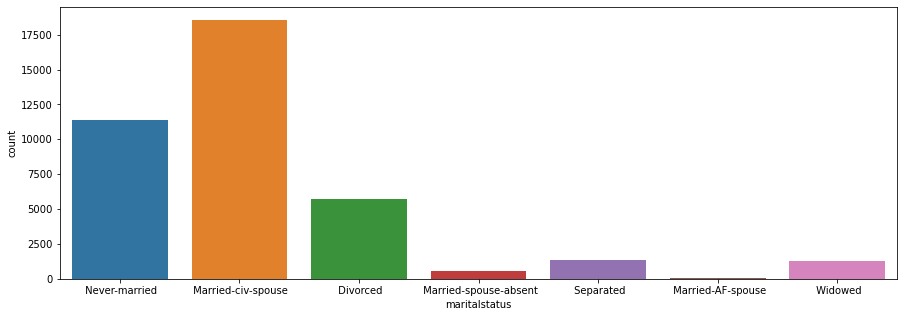

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(merged_data['maritalstatus'])
plt.show()

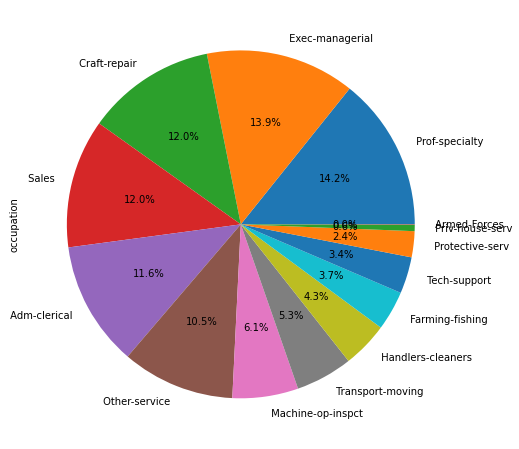

In [33]:
plt.figure(figsize=(8,8))
merged_data['occupation'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

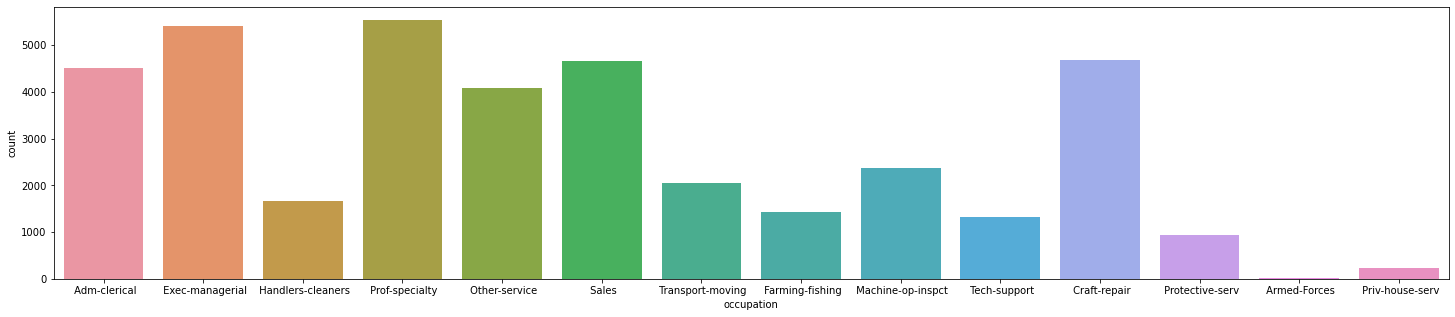

In [34]:
plt.figure(figsize=(25,5))
sns.countplot(merged_data['occupation'])
plt.show()

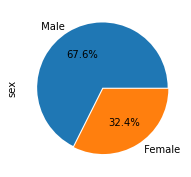

In [35]:
plt.figure(figsize=(3,3))
merged_data['sex'].value_counts().plot(kind='pie',explode=[0.01,0.01],autopct='%.1f%%')
plt.show()

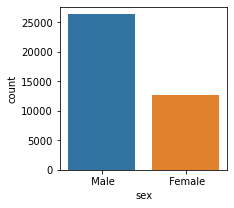

In [36]:
plt.figure(figsize=(3,3))
sns.countplot(merged_data['sex'])
plt.show()

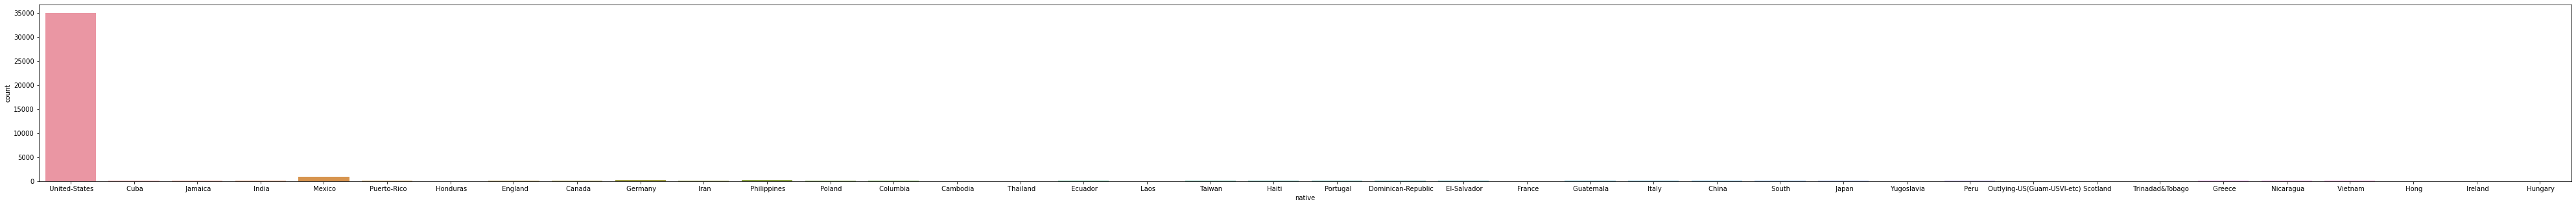

In [37]:
plt.figure(figsize=(70,5))
sns.countplot(merged_data['native'])
plt.show()

In [38]:
#Finding Correlation Matrics to check Multicollinearity
corr=merged_data.corr().round(2)
#Replace diagonal values as 0 from 1
np.fill_diagonal(a=corr.values,val=0)
corr

,age,capitalgain,capitalloss,hoursperweek
age,0.00,0.07,0.05,0.06
capitalgain,0.07,0.00,-0.04,0.08
capitalloss,0.05,-0.04,0.00,0.05
hoursperweek,0.06,0.08,0.05,0.00


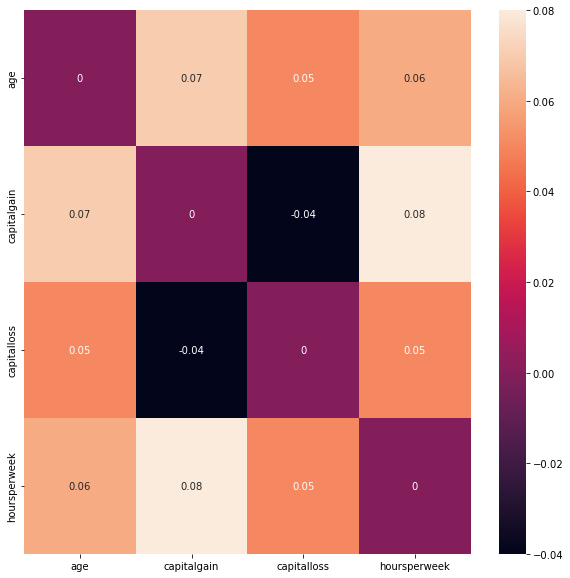

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

#### We can see from Heatmap that there is maximum of 20 % correlation between any two features. Hence, There is less multicollinearity exists

### Data Preparation

In [40]:
#Splitting the data into X (features) and y (lables)
X_train= train_data.iloc[:,:-1]
y_train= train_data.iloc[:,-1:]
X_test= test_data.iloc[:,:-1]
y_test= test_data.iloc[:,-1:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((25339, 10), (25339, 1), (13542, 10), (13542, 1))

In [41]:
#Label Encoding the columns of type 'Object' in the X_train data
le=LabelEncoder()
for column in X_train:
    if X_train[column].dtypes=='O':
        X_train[column] = le.fit_transform(X_train[column])
    else:
        continue
X_train

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,4,0,1,2174,0,40,37
1,50,4,9,2,3,1,0,0,13,37
2,38,2,11,0,5,1,0,0,40,37
3,53,2,1,2,5,1,0,0,40,37
4,28,2,9,2,9,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...
25334,53,2,12,2,3,1,0,0,40,37
25335,22,2,15,4,10,1,0,0,40,37
25336,27,2,7,2,12,0,0,0,38,37
25337,58,2,11,6,0,0,0,0,40,37


In [42]:
#Label Encoding the columns of type 'Object' in the X_test data
le=LabelEncoder()
for column in X_test:
    if X_test[column].dtypes=='O':
        X_test[column] = le.fit_transform(X_test[column])
    else:
        continue
X_test

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,4,6,1,0,0,40,37
1,38,2,11,2,4,1,0,0,50,37
2,28,1,7,2,10,1,0,0,40,37
3,44,2,15,2,6,1,7688,0,40,37
4,34,2,0,4,7,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...
13537,48,1,12,0,7,1,0,0,40,37
13538,39,2,9,0,9,0,0,0,36,37
13539,38,2,9,2,9,1,0,0,50,37
13540,44,2,9,0,0,1,5455,0,40,37


In [43]:
ss=StandardScaler()

X_train['age']=ss.fit_transform(X_train[['age']])
X_test['age']=ss.fit_transform(X_test[['age']])

X_train['capitalgain']=ss.fit_transform(X_train[['capitalgain']])
X_test['capitalgain']=ss.fit_transform(X_test[['capitalgain']])

X_train['capitalloss']=ss.fit_transform(X_train[['capitalloss']])
X_test['capitalloss']=ss.fit_transform(X_test[['capitalloss']])

X_train['hoursperweek']=ss.fit_transform(X_train[['hoursperweek']])
X_test['hoursperweek']=ss.fit_transform(X_test[['hoursperweek']])

In [44]:
y_train['Salary']=le.fit_transform(y_train['Salary'])
y_test['Salary']=le.fit_transform(y_test['Salary'])

In [45]:
X_train

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native
0,-0.044354,5,9,4,0,1,0.109941,-0.238574,-0.107582,37
1,0.791257,4,9,2,3,1,-0.160576,-0.238574,-2.251809,37
2,-0.120319,2,11,0,5,1,-0.160576,-0.238574,-0.107582,37
3,1.019151,2,1,2,5,1,-0.160576,-0.238574,-0.107582,37
4,-0.879966,2,9,2,9,0,-0.160576,-0.238574,-0.107582,4
...,...,...,...,...,...,...,...,...,...,...
25334,1.019151,2,12,2,3,1,-0.160576,-0.238574,-0.107582,37
25335,-1.335754,2,15,4,10,1,-0.160576,-0.238574,-0.107582,37
25336,-0.955930,2,7,2,12,0,-0.160576,-0.238574,-0.266414,37
25337,1.398974,2,11,6,0,0,-0.160576,-0.238574,-0.107582,37


In [46]:
X_test

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,hoursperweek,native
0,-1.087947,2,1,4,6,1,-0.153327,-0.231221,-0.096081,37
1,-0.118496,2,11,2,4,1,-0.153327,-0.231221,0.706937,37
2,-0.864228,1,7,2,10,1,-0.153327,-0.231221,-0.096081,37
3,0.328944,2,15,2,6,1,0.799491,-0.231221,-0.096081,37
4,-0.416788,2,0,4,7,1,-0.153327,-0.231221,-0.899099,37
...,...,...,...,...,...,...,...,...,...,...
13537,0.627237,1,12,0,7,1,-0.153327,-0.231221,-0.096081,37
13538,-0.043922,2,9,0,9,0,-0.153327,-0.231221,-0.417288,37
13539,-0.118496,2,9,2,9,1,-0.153327,-0.231221,0.706937,37
13540,0.328944,2,9,0,0,1,0.522742,-0.231221,-0.096081,37


In [47]:
y_train,y_test

(       Salary
 0           0
 1           0
 2           0
 3           0
 4           0
 ...       ...
 25334       1
 25335       0
 25336       0
 25337       0
 25338       1
 
 [25339 rows x 1 columns],
        Salary
 0           0
 1           0
 2           1
 3           1
 4           0
 ...       ...
 13537       0
 13538       0
 13539       0
 13540       0
 13541       1
 
 [13542 rows x 1 columns])

### Model Training || Model Testing || Model Evaluation

#### 1. Linear Model

In [48]:
svc_linear=SVC(kernel='linear',decision_function_shape ='ovo')
svc_linear.fit(X_train,y_train)

SVC(decision_function_shape='ovo', kernel='linear')

In [49]:
y_pred_linear_train=svc_linear.predict(X_train)
y_pred_linear_test=svc_linear.predict(X_test)

In [50]:
confusion_matrix(y_train,y_pred_linear_train)

array([[17542,   981],
       [ 4593,  2223]], dtype=int64)

In [51]:
confusion_matrix(y_test,y_pred_linear_test)

array([[9528,  526],
       [2403, 1085]], dtype=int64)

In [52]:
print(classification_report(y_train,y_pred_linear_train))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86     18523
           1       0.69      0.33      0.44      6816

    accuracy                           0.78     25339
   macro avg       0.74      0.64      0.65     25339
weighted avg       0.77      0.78      0.75     25339



In [53]:
print(classification_report(y_test,y_pred_linear_test))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     10054
           1       0.67      0.31      0.43      3488

    accuracy                           0.78     13542
   macro avg       0.74      0.63      0.65     13542
weighted avg       0.77      0.78      0.75     13542



In [54]:
train_acc_linear=accuracy_score(y_train,y_pred_linear_train)
train_acc_linear

0.7800228896167962

In [55]:
test_acc_linear=accuracy_score(y_test,y_pred_linear_test)
test_acc_linear

0.7837099394476443

#### 2. rbf Model

In [56]:
svc_rbf=SVC(kernel='rbf',decision_function_shape ='ovo')
svc_rbf.fit(X_train,y_train)

SVC(decision_function_shape='ovo')

In [57]:
y_pred_rbf_train=svc_rbf.predict(X_train)
y_pred_rbf_test=svc_rbf.predict(X_test)

In [58]:
confusion_matrix(y_train,y_pred_rbf_train)

array([[17909,   614],
       [ 5020,  1796]], dtype=int64)

In [59]:
confusion_matrix(y_test,y_pred_rbf_test)

array([[9728,  326],
       [2606,  882]], dtype=int64)

In [60]:
print(classification_report(y_train,y_pred_rbf_train))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86     18523
           1       0.75      0.26      0.39      6816

    accuracy                           0.78     25339
   macro avg       0.76      0.62      0.63     25339
weighted avg       0.77      0.78      0.74     25339



In [61]:
print(classification_report(y_test,y_pred_rbf_test))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     10054
           1       0.73      0.25      0.38      3488

    accuracy                           0.78     13542
   macro avg       0.76      0.61      0.62     13542
weighted avg       0.77      0.78      0.74     13542



In [62]:
train_acc_rbf=accuracy_score(y_train,y_pred_rbf_train)
train_acc_rbf

0.7776549982240815

In [63]:
test_acc_rbf=accuracy_score(y_test,y_pred_rbf_test)
test_acc_rbf

0.7834884064392261

#### 3. poly Model

In [64]:
svc_poly=SVC(kernel='poly',decision_function_shape ='ovo')
svc_poly.fit(X_train,y_train)

SVC(decision_function_shape='ovo', kernel='poly')

In [65]:
y_pred_poly_train=svc_poly.predict(X_train)
y_pred_poly_test=svc_poly.predict(X_test)

In [66]:
confusion_matrix(y_train,y_pred_poly_train)

array([[17870,   653],
       [ 4807,  2009]], dtype=int64)

In [67]:
confusion_matrix(y_test,y_pred_poly_test)

array([[9698,  356],
       [2513,  975]], dtype=int64)

In [68]:
print(classification_report(y_train,y_pred_poly_train))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     18523
           1       0.75      0.29      0.42      6816

    accuracy                           0.78     25339
   macro avg       0.77      0.63      0.65     25339
weighted avg       0.78      0.78      0.75     25339



In [69]:
print(classification_report(y_test,y_pred_poly_test))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     10054
           1       0.73      0.28      0.40      3488

    accuracy                           0.79     13542
   macro avg       0.76      0.62      0.64     13542
weighted avg       0.78      0.79      0.75     13542



In [70]:
train_acc_poly=accuracy_score(y_train,y_pred_poly_train)
train_acc_poly

0.7845218832629544

In [71]:
test_acc_poly=accuracy_score(y_test,y_pred_poly_test)
test_acc_poly

0.7881405996160095

#### 4. sigmoid Model

In [72]:
svc_sigmoid=SVC(kernel='sigmoid',decision_function_shape ='ovo')
svc_sigmoid.fit(X_train,y_train)

SVC(decision_function_shape='ovo', kernel='sigmoid')

In [73]:
y_pred_sigmoid_train=svc_sigmoid.predict(X_train)
y_pred_sigmoid_test=svc_sigmoid.predict(X_test)

In [74]:
confusion_matrix(y_train,y_pred_sigmoid_train)

array([[15496,  3027],
       [ 5132,  1684]], dtype=int64)

In [75]:
confusion_matrix(y_test,y_pred_sigmoid_test)

array([[8402, 1652],
       [2692,  796]], dtype=int64)

In [76]:
print(classification_report(y_train,y_pred_sigmoid_train))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79     18523
           1       0.36      0.25      0.29      6816

    accuracy                           0.68     25339
   macro avg       0.55      0.54      0.54     25339
weighted avg       0.65      0.68      0.66     25339



In [77]:
print(classification_report(y_test,y_pred_sigmoid_test))

              precision    recall  f1-score   support

           0       0.76      0.84      0.79     10054
           1       0.33      0.23      0.27      3488

    accuracy                           0.68     13542
   macro avg       0.54      0.53      0.53     13542
weighted avg       0.65      0.68      0.66     13542



In [78]:
train_acc_sigmoid=accuracy_score(y_train,y_pred_sigmoid_train)
train_acc_sigmoid

0.6780062354473342

In [79]:
test_acc_sigmoid=accuracy_score(y_test,y_pred_sigmoid_test)
test_acc_sigmoid

0.6792202038103677

### Consolidated Evaluation

In [80]:
consolidated = pd.DataFrame()
consolidated['Models - Kernals']=pd.Series(['Linear','Rbf','Poly','Sigmoid'])
consolidated['Training Accuracy']=pd.Series([train_acc_linear,train_acc_rbf,train_acc_poly,train_acc_sigmoid])
consolidated['Testing Accuracy']=pd.Series([test_acc_linear,test_acc_rbf,test_acc_poly,test_acc_sigmoid])
consolidated

,Models - Kernals,Training Accuracy,Testing Accuracy
0,Linear,0.780023,0.783710
1,Rbf,0.777655,0.783488
2,Poly,0.784522,0.788141
3,Sigmoid,0.678006,0.679220


#### We can observe from above table that, Poly model has More Training Accuracy and Testing Accuracy. We can also see that Testing accuracy is more than Training accuracy, which indicates under fitting.

### End !!!